# Interactive DenseNet121 Notebook for computation [BETA]
This notebook is jus beta version for all-in-one computation with less effort.

## Without ROI mask

In [5]:
# Run DenseNet121 without ROI mask
# Train and Test shall be done simultaneously
! cd no_ROI && python main.py && cd ..

Device in use:
GeForce GTX 1060
Training...:   0%| | 0/1019 [00:00<?, ?it/s, epoch=1, batch_number=1, train_loss/home/dsanhnt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Training...: 100%|█| 1019/1019 [04:30<00:00,  3.76it/s, epoch=1, batch_number=10
Training...: 100%|█| 1019/1019 [04:32<00:00,  3.74it/s, epoch=2, batch_number=10
Training...: 100%|█| 1019/1019 [04:32<00:00,  3.74it/s, epoch=3, batch_number=10
Training...: 100%|█| 1019/1019 [04:32<00:00,  3.74it/s, epoch=4, batch_number=10
Training...: 100%|█| 1019/1019 [04:32<00:00,  3.74it/s, epoch=5, batch_number=10
Training...: 100%|█| 1019/1019 [04:32<00:00,  3.74it/s, epoch=6, b

In [6]:
# To see how good the results are, Gradient-weighted Class Activation Mapping (Grad-CAM) need to be runned
# More detail available at https://github.com/ramprs/grad-cam/
! cd no_ROI && python grad_cam.py && cd ..

0it [00:00, ?it/s]/home/dsanhnt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
604it [2:20:38, 27.92s/it]^C
604it [2:20:57, 14.00s/it]
Traceback (most recent call last):
  File "grad_cam.py", line 120, in <module>
    plt.savefig(grad_cam_path + "predicted " + x + "_" + str(batch_index)+".png")
  File "/home/dsanhnt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py", line 967, in savefig
    fig.canvas.draw_idle()   # need this if 'transparent=True' to reset colors
  File "/home/dsanhnt/anaconda3/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 2055, in draw_idle
    self.draw(*args, **kwargs)
  File "/home/dsanhn

## With Region-of-Interests (ROI) mask

In [68]:
# Run DenseNet121 with ROI mask
# Train and Test shall be done simultaneously
! cd with_ROI && python main.py && cd ..

Using cache found in /home/dsanhnt/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
Caching:   0%|                                        | 0/10190 [00:00<?, ?it/s]/home/dsanhnt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Caching: 100%|█████████████████████████████| 2907/2907 [00:10<00:00, 289.07it/s]
Device in use:
GeForce GTX 1060
Training...: 100%|█| 1019/1019 [03:08<00:00,  5.42it/s, epoch=1, batch_number=10
Training...: 100%|█| 1019/1019 [03:06<00:00,  5.46it/s, epoch=2, batch_number=10
Training...: 100%|█| 1019/1019 [03:12<00:00,  5.28it/s, epoch=3, batch_number=10
Training...: 100%|█| 1019/1019 [03:09<00:00,  5.3

In [1]:
# To see how good the results are, Gradient-weighted Class Activation Mapping (Grad-CAM) need to be runned
# More detail available at https://github.com/ramprs/grad-cam/
! cd with_ROI/ && python grad_cam.py && cd ..

0it [00:00, ?it/s]/home/dsanhnt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
306it [37:43, 14.59s/it]

## Here we can display the results (Training Set)

In [72]:
# Here we take the path to our most recent statistic from our training models
stat_no_ROI   = "./no_ROI/*.json"
stat_with_ROI = "./with_ROI/*.json"

In [1]:
# There's packages we need here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def metrics_plot(file):
    stat_file = pd.read_json(file)
    N = len(list(set(stat_file["epoch"].tolist())))
    
    df1 = pd.DataFrame()
    df2 = [ pd.DataFrame(stat_file[stat_file["epoch"]==n].mean()) for n in range(N+1) ]
    df2 = pd.concat(df2,axis=1).T[1:]
    
    plt.figure(dpi=120)
    x_axis = df2["epoch"]
    for keys in ["train_loss","val_loss"]:
        y_axis = df2[keys]
        plt.plot(x_axis,y_axis,"o-",label = keys)
        plt.annotate(round(y_axis.iloc[0],3),xy= (x_axis.iloc[0],y_axis.iloc[0]),xytext = (x_axis.iloc[0]+0.5,y_axis.iloc[0]),
                    arrowprops = dict(arrowstyle="->",connectionstyle = "arc3")
                    )
        plt.annotate(round(y_axis.iloc[-1],3),xy= (x_axis.iloc[-1],y_axis.iloc[-1]),xytext = (x_axis.iloc[-1]+0.5,y_axis.iloc[-1]),
                    arrowprops = dict(arrowstyle="->",connectionstyle = "arc3")
                    )
    plt.legend(loc = "upper right")
    plt.title("Loss")
    plt.xlabel("num_epoch")
    plt.ylabel("cross_entropy_loss")
    plt.grid(True)
    #plt.yticks(np.arange(0,1,step=0.2))
    plt.show()

    plt.figure(dpi=120)
    for keys in ["precision","recall","accuracy","AUC","F1"]:
        y_axis = df2[keys]
        plt.plot(x_axis,y_axis,"o-",label = keys)
        plt.annotate(round(y_axis.iloc[0],3),xy= (x_axis.iloc[0],y_axis.iloc[0]),xytext = (x_axis.iloc[0]+0.5,y_axis.iloc[0]),
                    arrowprops = dict(arrowstyle="->",connectionstyle = "arc3")
                    )
        plt.annotate(round(y_axis.iloc[-1],3),xy= (x_axis.iloc[-1],y_axis.iloc[-1]),xytext = (x_axis.iloc[-1]+0.5,y_axis.iloc[-1]),
                    arrowprops = dict(arrowstyle="->",connectionstyle = "arc3")
                    )
    plt.legend(loc = "lower right")
    plt.title("Performance metric")
    plt.xlabel("num_epoch")
    plt.ylabel("metric")
    plt.ylim(0,1.1)
    plt.grid(True)
    #plt.yticks(np.arange(0,1,step=0.2))
    plt.show()

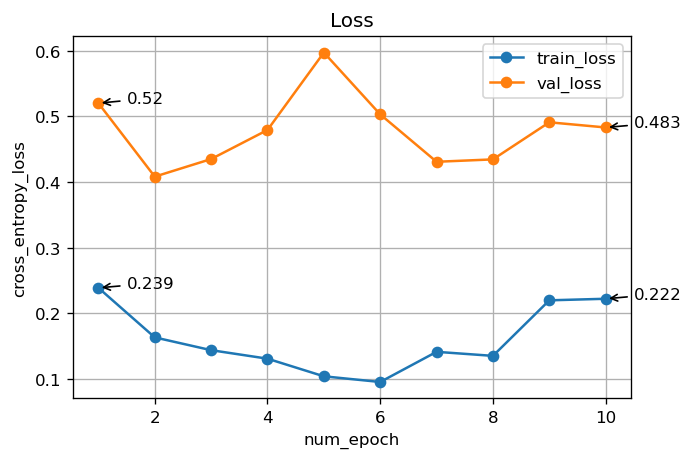

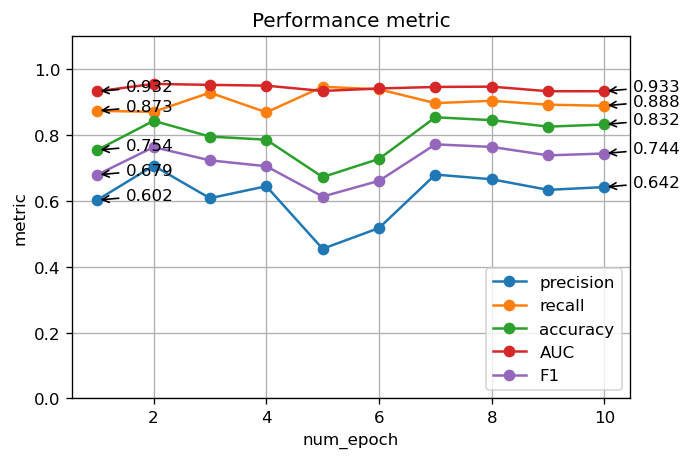

In [2]:
file = "with_ROI/model_backup/archive/stats_densenet121_e10_bs10_19-09-2021_10:44:39.json"
metrics_plot(file)

## Here's training results for without ROI scenario

In [69]:
# metrics_plot(stat_no_ROI)

## Here's training results for out ROI scenario - Masks are overlaid on X-Ray/CT-Scan Images

In [70]:
# metrics_plot(stat_with_ROI)

## Test Set

In [77]:
# There's packages we need here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Here we take the path to our most recent statistic from our training models
stat_no_ROI_test   = "no_ROI/model_backup/stats_densenet121_e10_bs10_21-09-2021_01:58:47_test.json"
stat_with_ROI_test = "with_ROI/model_backup/stats_densenet121_e10_bs10_21-09-2021_08:05:29_test.json"

def barchart_metrics(file):
    df = pd.read_json(file)

    metrics = ["test_loss","precision","recall","accuracy","AUC","F1"]
    plt.figure(dpi=120)
    x_axis = metrics
    y_axis = [df[keys].mean() for keys in metrics]
    c = ["tab:cyan","tab:blue","tab:orange","tab:green","tab:red","tab:purple"]
    barlist = plt.bar(x_axis,y_axis,width=0.5)
    for i in range(len(metrics)):
        barlist[i].set_color(c[i])
    for bar in barlist.patches:
        plt.annotate(format(bar.get_height(), '.4f'),
                    (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')
    plt.xticks(rotation = 90)
    plt.ylabel("metric")
    plt.ylim(0,1.1)
    plt.title("Test results")
    plt.show()
    

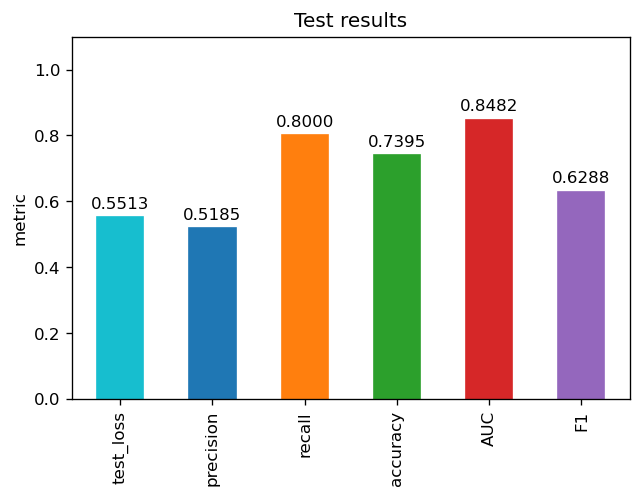

In [80]:
file = "with_ROI/model_backup/stats_densenet121_e10_bs10_21-09-2021_10:57:15_test.json"
barchart_metrics(file)

In [78]:
# barchart_metrics(stat_no_ROI_test)

In [79]:
# barchart_metrics(stat_with_ROI_test)